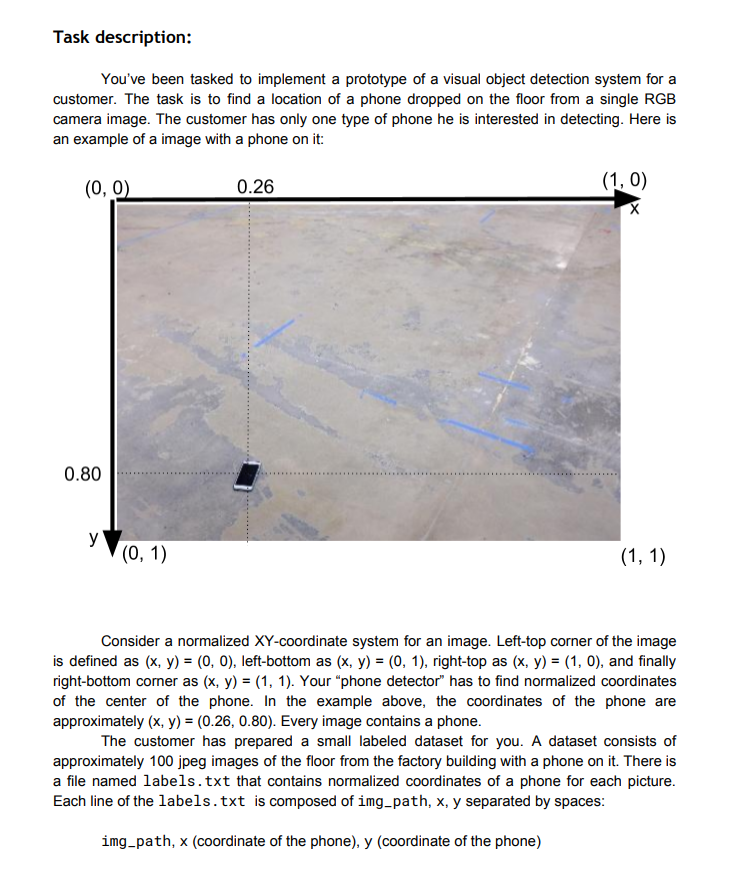

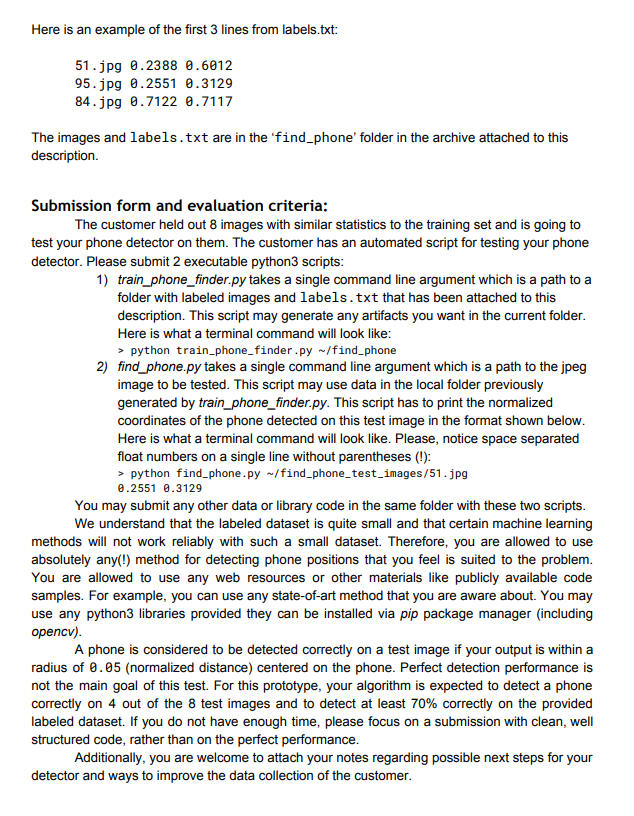

<u><font size = '3'>**First create a function to identify the location given x, y coordinates** <font></u>

In [1]:
import os
from os import walk, path, listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

#get current directory 
current_dir = os.getcwd()

#find phone directory
find_phone_dir = current_dir + '\\find_phone'

#get the file names in the find phone directory
filenames = [f for f in listdir(find_phone_dir) if isfile(join(find_phone_dir, f))]

#get the image names
labels_file = filenames.pop(len(filenames)-1)
num_samples = len(filenames)

#print lists
print(labels_file, '\n')
print(filenames)
print('\nNumber of files: ', num_samples)

labels.txt 

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg', '108.jpg', '109.jpg', '11.jpg', '110.jpg', '111.jpg', '112.jpg', '113.jpg', '114.jpg', '115.jpg', '116.jpg', '117.jpg', '118.jpg', '119.jpg', '12.jpg', '120.jpg', '121.jpg', '122.jpg', '123.jpg', '124.jpg', '125.jpg', '126.jpg', '127.jpg', '128.jpg', '129.jpg', '13.jpg', '130.jpg', '131.jpg', '132.jpg', '133.jpg', '134.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '20.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '29.jpg', '3.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '4.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '5.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '57.jpg', '58.jpg', '59.jpg', '6.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '66.jpg', '67.jpg', '68.jpg', '69.jpg

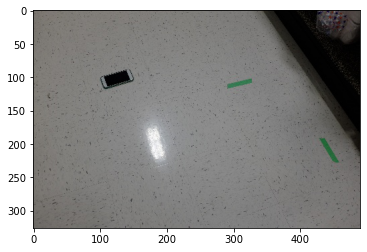

In [2]:
#open a random image and plot
random_image = np.random.choice(filenames)
im = img.imread(find_phone_dir + '\\' + random_image)
plt.imshow(im)
plt.show()

In [3]:
#get the label files
label = open(find_phone_dir + '\\' + str(labels_file), 'r')
labels = label.read()
label_list = labels.split('\n')

#delete the last element ('')
label_list.pop()
print('\nThe number of coordinates and labels availabel: ', len(label_list), '\n')

print(label_list)


The number of coordinates and labels availabel:  129 

['51.jpg 0.2388 0.6012', '95.jpg 0.2551 0.3129', '84.jpg 0.7122 0.7117', '118.jpg 0.5286 0.4877', '115.jpg 0.7714 0.3252', '33.jpg 0.1122 0.3466', '58.jpg 0.8449 0.1564', '119.jpg 0.4837 0.4509', '38.jpg 0.2612 0.8037', '8.jpg 0.6551 0.3466', '47.jpg 0.1878 0.1104', '131.jpg 0.7837 0.6503', '48.jpg 0.6020 0.1135', '130.jpg 0.1490 0.6442', '93.jpg 0.8061 0.2699', '50.jpg 0.4082 0.7791', '112.jpg 0.4327 0.8405', '121.jpg 0.2286 0.8712', '97.jpg 0.7571 0.4264', '120.jpg 0.8367 0.7147', '99.jpg 0.3714 0.5307', '82.jpg 0.5980 0.1258', '54.jpg 0.6837 0.7485', '74.jpg 0.2531 0.2117', '78.jpg 0.7551 0.4847', '128.jpg 0.6939 0.2975', '83.jpg 0.5837 0.2117', '75.jpg 0.7796 0.7454', '37.jpg 0.8490 0.6626', '86.jpg 0.2347 0.2209', '45.jpg 0.8857 0.4387', '110.jpg 0.5592 0.5767', '113.jpg 0.5163 0.5000', '61.jpg 0.3347 0.3436', '100.jpg 0.8204 0.8558', '132.jpg 0.2878 0.4448', '12.jpg 0.1857 0.8589', '129.jpg 0.1898 0.2669', '6.jpg 0.3531 0.77

In [4]:
#add file name and coordinates to a dictionary 
coords = {}

for name in label_list:
    
    name_split = name.split(' ')
    coords[name_split[0]] = tuple((float(name_split[1]), float(name_split[2])))

<font size = '3'> <u>**Check data**</u></font>



Length of pix_x:  129
Length of pix_y:  129
Number of pixels in x:  [490]
Number of pixels in y:  [326]


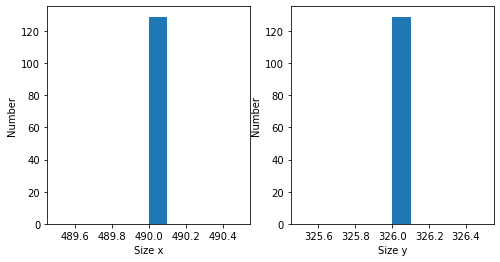

In [5]:
#first check if all the images are the same size
pix_x = []
pix_y = []

#get the x and y shapes of the images 
for i in range(len(filenames)):
    
    im = img.imread(find_phone_dir + '\\' + filenames[i])
    pix_x.append(im.shape[1])
    pix_y.append(im.shape[0])
    
print('Length of pix_x: ', len(pix_x))
print('Length of pix_y: ', len(pix_y))
print('Number of pixels in x: ', np.unique(pix_x)) #to make sure all the pixels are the same size
print('Number of pixels in y: ', np.unique(pix_y))

#plot to see if all the images have the same pixel size in x and y directions. to double check.
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(8)
ax[0].hist(pix_x)
ax[1].hist(pix_y)
ax[0].set_ylabel('Number')
ax[0].set_xlabel('Size x')
ax[1].set_ylabel('Number')
ax[1].set_xlabel('Size y')
plt.show()

- The number of pixels in the x direction of all images is 490
- The number of pixels in the y direction of all images is 326

Flattening the images and normalizing.

- Each image vector should be of length (1, 326 x 490 x 3)

In [6]:
#vector length
vec_length = 326 * 490 * 3

#get all the images to one vector
X = np.zeros([num_samples, vec_length])

#create vector for Y for x and y coordinates
Y = np.zeros([num_samples, 2])

for i in range(len(filenames)):
    
    im_orig = img.imread(find_phone_dir + '\\' + filenames[i])
    im_flattened = im_orig.reshape(1, -1)
    im = im_flattened/255
    
    X[i, :] = im
    Y[i, 0] = coords[filenames[i]][0]
    Y[i, 1] = coords[filenames[i]][1]

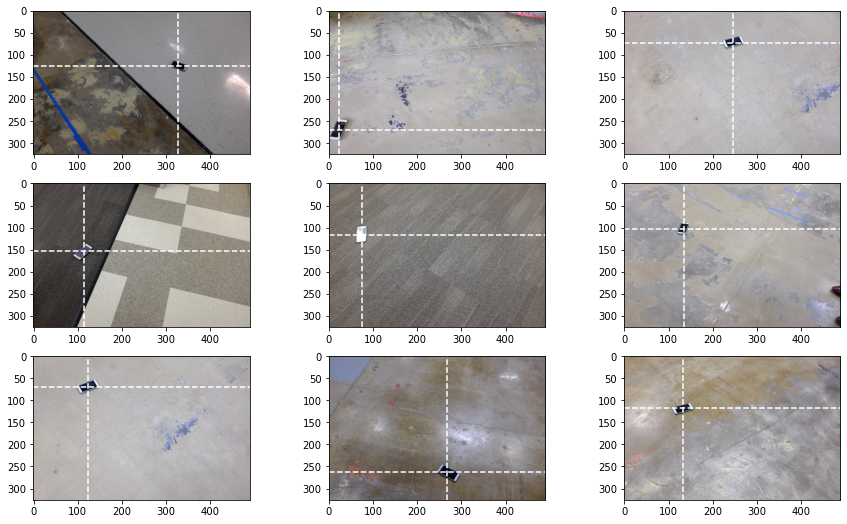

In [7]:
#plot a few figures and see if everything is organized correctly 
random_index = np.random.choice(np.arange(0, 128), 9)

fig, axs = plt.subplots(3, 3, figsize=(15, 9))
axs = axs.ravel()

for i in range(len(random_index)):
    
    im = img.imread(find_phone_dir + '\\' + filenames[random_index[i]])
    x_coord = coords[filenames[random_index[i]]][0] * 490
    y_coord = coords[filenames[random_index[i]]][1] * 326
    axs[i].axhline(y = y_coord, xmin = 0, xmax = 490, linestyle = '--', color = 'w')
    axs[i].axvline(x = x_coord, ymin = 0, ymax = 326, linestyle = '--', color = 'w')
    axs[i].imshow(im)

In [8]:
#save to a csv file
import pandas as pd

#create a dataframe and add filenames
df = pd.DataFrame()
df['FileName'] = filenames

#add the pixels
df = pd.concat([df, pd.DataFrame(X)], axis = 1)

#add the x and y coordinates
df['XCoords'] = Y[:, 0]
df['YCoords'] = Y[:, 1]

df.head(5)

,FileName,0,1,2,3,4,5,6,7,8,...,479212,479213,479214,479215,479216,479217,479218,479219,XCoords,YCoords
0,0.jpg,0.478431,0.462745,0.450980,0.482353,0.466667,0.454902,0.505882,0.490196,0.478431,...,0.654902,0.650980,0.686275,0.670588,0.666667,0.682353,0.666667,0.662745,0.8306,0.1350
1,1.jpg,0.333333,0.270588,0.207843,0.309804,0.247059,0.184314,0.407843,0.345098,0.286275,...,0.564706,0.505882,0.607843,0.572549,0.513725,0.603922,0.568627,0.509804,0.8714,0.1718
2,10.jpg,0.482353,0.443137,0.403922,0.486275,0.447059,0.407843,0.470588,0.431373,0.392157,...,0.031373,0.019608,0.043137,0.027451,0.015686,0.043137,0.027451,0.015686,0.4918,0.4356
3,100.jpg,0.019608,0.011765,0.015686,0.011765,0.003922,0.007843,0.027451,0.019608,0.023529,...,0.411765,0.400000,0.419608,0.400000,0.388235,0.419608,0.400000,0.388235,0.8204,0.8558
4,101.jpg,0.686275,0.650980,0.631373,0.694118,0.658824,0.639216,0.698039,0.662745,0.643137,...,0.596078,0.600000,0.600000,0.580392,0.596078,0.603922,0.584314,0.600000,0.2000,0.6503


<font size = '3'> <u>**Train a very basic deep learning algorithm using tensorflow**</u></font>

First, split the data to 80% train and 20% test data. Later will cross validate (100 train and 29 test)

In [10]:
import tensorflow as tf2

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [11]:
# import the necessary packages
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [12]:
#split to test and train 
X_train = X[:100, :]
Y_train = Y[:100, :]

#test
X_test = X[100:129, :]
Y_test = Y[100:129, :]

In [15]:
#create the model
# model = tf.keras.models.Sequential([tf.keras.layers.Dense(128, activation = 'relu'), \
#                                     tf.keras.layers.Dropout(0.3),\
#                                     tf.keras.layers.Dense(64, activation = 'relu'), \
#                                     tf.keras.layers.Dense(32, activation = 'relu'), \
#                                     tf.keras.layers.Dense(2, activation = 'sigmoid')])

model = tf.keras.models.Sequential([tf.keras.layers.Dense(128, activation = 'relu')\
                                    ,tf.keras.layers.Dense(64, activation = 'relu')\
                                    ,tf.keras.layers.Dense(32, activation = 'relu')\
                                    ,tf.keras.layers.Dense(16, activation = 'relu')\
                                    ,tf.keras.layers.Dense(8, activation = 'relu')\
                                    ,tf.keras.layers.Dense(4, activation = 'relu')\
                                   ,tf.keras.layers.Dense(2)])

model.compile(loss = 'mse', optimizer = 'adam')

In [16]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 10)

Train on 100 samples, validate on 29 samples
Epoch 1/10
100/100 [==============================] - 1s 13ms/sample - loss: 6455.1674 - val_loss: 1.8337
Epoch 2/10
100/100 [==============================] - 1s 12ms/sample - loss: 0.7743 - val_loss: 0.2714
Epoch 3/10
100/100 [==============================] - 1s 12ms/sample - loss: 1.5369 - val_loss: 3.7501
Epoch 4/10
100/100 [==============================] - 1s 12ms/sample - loss: 1.7510 - val_loss: 0.2710
Epoch 5/10
100/100 [==============================] - 1s 12ms/sample - loss: 0.3077 - val_loss: 0.2704
Epoch 6/10
100/100 [==============================] - 1s 12ms/sample - loss: 0.3072 - val_loss: 0.2697
Epoch 7/10
100/100 [==============================] - 1s 12ms/sample - loss: 0.3066 - val_loss: 0.2690
Epoch 8/10
100/100 [==============================] - 1s 12ms/sample - loss: 0.3059 - val_loss: 0.2682
Epoch 9/10
100/100 [==============================] - 1s 12ms/sample - loss: 0.3052 - val_loss: 0.2675
Epoch 10/10
100/100 [====

In [17]:
preds = model.predict(X_test)
preds

array([[ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161, -0.00823109],
       [ 0.01558161,

**CNN Model**

In [10]:
import random

from PIL import Image, ImageDraw

from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout

In [11]:
#get a rando
filenames = random.sample(filenames, len(filenames))

In [12]:
#get all the images to one vector
X = np.zeros([num_samples, 326, 490, 3])

#create vector for Y for x and y coordinates
Y = np.zeros([num_samples, 2])

for i in range(len(filenames)):
    
    im = img.imread(find_phone_dir + '\\' + filenames[i])   
    X[i, :] = im
    Y[i, 0] = coords[filenames[i]][0]
    Y[i, 1] = coords[filenames[i]][1]

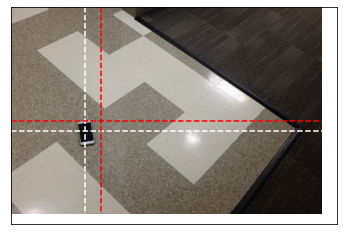

In [13]:
#function to plot the photo, center and predicted center
def plot_data(image, gt_coord, pred_coord = None):
    
    #extract coordinates
    x_coord, y_coord = gt_coord
    
    plt.imshow(image.astype('uint8'))
    plt.hlines(y = y_coord * 326, xmin = 0, xmax = 490, linestyle = '--', color = 'w')
    plt.vlines(x = x_coord * 490, ymin = 0, ymax = 326, linestyle = '--', color = 'w')
    plt.xticks([])
    plt.yticks([])
    
    if len(pred_coord) > 1:
        
        x_pred, y_pred = pred_coord
        plt.hlines(y = y_pred * 326, xmin = 0, xmax = 490, linestyle = '--', color = 'r')
        plt.vlines(x = x_pred * 490, ymin = 0, ymax = 326, linestyle = '--', color = 'r')
        
    plt.show()
        
plot_data(X[100], (Y[100, 0], Y[100, 1]), (Y[100, 0] + 0.05, Y[100, 1] - 0.05))

In [22]:
#split to test and train sets. First split the first 100 as train and the rest as test
X_train = X[:100]
print('X train shape: ', X_train.shape)
X_test = X[100: len(X)]
print('X test shape: ', X_test.shape)

Y_train = Y[:100]
print('Y train shape: ', Y_train.shape)
Y_test = Y[100: len(X)]
print('Y test shape: ', Y_test.shape)

#put the train images and coordinates to a dictionary
inp = {'images': X_train}
out = {'coords': Y_train}

X train shape:  (100, 326, 490, 3)
X test shape:  (29, 326, 490, 3)
Y train shape:  (100, 2)
Y test shape:  (29, 2)


In [23]:
#create the model 
#input shape
input_ = Input(shape = (326, 490, 3), name = 'images')

x = input_

for i in range(0, 5):
    
    n_filters = 2**(4 + i)
    x = Conv2D(n_filters, 3, activation = 'relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(2)(x)

x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(16, activation = 'relu')(x)

#get the coordinate 
coord_out = Dense(2, name = 'coords')(x)

model = tf.keras.models.Model(input_, coord_out)
#model.summary()

In [24]:
model.compile(loss = 'mse',
    optimizer = tf.keras.optimizers.Adam(), metrics = {'coords': 'MeanSquaredError'})

In [25]:
preds = model.fit(x = inp, y = out, epochs = 15)

Train on 100 samples
Epoch 1/15
100/100 [==============================] - 21s 212ms/sample - loss: 18.6417 - mean_squared_error: 18.6417
Epoch 2/15
100/100 [==============================] - 22s 219ms/sample - loss: 7.7857 - mean_squared_error: 7.7857
Epoch 3/15
100/100 [==============================] - 22s 217ms/sample - loss: 6.9908 - mean_squared_error: 6.9908
Epoch 4/15
100/100 [==============================] - 24s 242ms/sample - loss: 3.0612 - mean_squared_error: 3.0612
Epoch 5/15
100/100 [==============================] - 21s 213ms/sample - loss: 1.6972 - mean_squared_error: 1.6972
Epoch 6/15
100/100 [==============================] - 21s 213ms/sample - loss: 1.0298 - mean_squared_error: 1.0298
Epoch 7/15
100/100 [==============================] - 21s 214ms/sample - loss: 0.6523 - mean_squared_error: 0.6523
Epoch 8/15
100/100 [==============================] - 22s 217ms/sample - loss: 0.3007 - mean_squared_error: 0.3007
Epoch 9/15
100/100 [==============================] - 21s

In [26]:
#predictions
preds = model.predict(X_test)

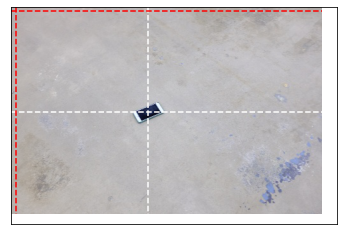

In [27]:
plot_data(X_test[10], Y_test[10], preds[10])

**convert to grayscale**

The predictions are bad. So let's use gray scale images because the phones in all images seems to have a white cover and a black screen so using gray scale might help.

In [28]:
#convert the images to gray scale
rgb_weights = [0.2989, 0.5870, 0.1140]
X_gs = X @ rgb_weights

#check the shape
print('The shape after converting to grayscale is: ', X_gs.shape)

The shape after converting to grayscale is:  (129, 326, 490)


In [67]:
#black and white image
X_bw = np.zeros([len(X_gs), 326, 490])

for s in range(len(X_gs)):
    for i in range(X_gs.shape[1]):
        for k in range(X_gs.shape[2]):
            
            if X_gs[s, i, k] <= 75:
                X_bw[s, i, k] = 0
            else:
                X_bw[s, i, k] = 255
            

The shape after converting to black and white is:  (129, 326, 490)


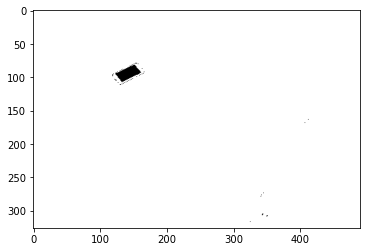

In [127]:
#print shape and plot a few figures
print('The shape after converting to black and white is: ', X_bw.shape)

#plot a few samples
rand_int = np.random.choice(np.arange(0, 129))

plt.imshow(X_bw[rand_int].astype('uint8'), cmap=plt.get_cmap("gray"))
plt.show()

In [337]:
#split to train and test sets
X_train = X_bw[:100]
Y_train = Y[:100]
X_test = X_bw[100:len(X_bw)]
Y_test = Y[100: len(X_bw)]

inp = {'images': X_train}
out = {'coords': Y_train}

In [338]:
#create the model 
#input shape
input_ = Input(shape = (326, 490), name = 'images')

x = input_

# for i in range(0, 5):
    
#     n_filters = 2**(4 + i)
#     #x = Conv2D(n_filters, 3, activation = 'relu')(x)
#     x = BatchNormalization()(x)
#     x = MaxPool2D(2)(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(16, activation = 'relu')(x)

#get the coordinate 
coord_out = Dense(2, name = 'coords')(x)

model = tf.keras.models.Model(input_, coord_out)
#model.summary()

model.compile(loss = 'mse',
    optimizer = tf.keras.optimizers.Adam(), metrics = {'coords': 'MeanSquaredError'})

In [342]:
preds = model.fit(x = inp, y = out, epochs = 10)

Train on 100 samples
Epoch 1/10
100/100 [==============================] - 1s 7ms/sample - loss: 36.4317 - mean_squared_error: 36.4317
Epoch 2/10
100/100 [==============================] - 1s 7ms/sample - loss: 29.9626 - mean_squared_error: 29.9626
Epoch 3/10
100/100 [==============================] - 1s 6ms/sample - loss: 16.5880 - mean_squared_error: 16.5880
Epoch 4/10
100/100 [==============================] - 1s 7ms/sample - loss: 9.6226 - mean_squared_error: 9.6226
Epoch 5/10
100/100 [==============================] - 1s 7ms/sample - loss: 12.2172 - mean_squared_error: 12.2172
Epoch 6/10
100/100 [==============================] - 1s 6ms/sample - loss: 7.8071 - mean_squared_error: 7.8071
Epoch 7/10
100/100 [==============================] - 1s 7ms/sample - loss: 9.7797 - mean_squared_error: 9.7797
Epoch 8/10
100/100 [==============================] - 1s 6ms/sample - loss: 4.8489 - mean_squared_error: 4.8489
Epoch 9/10
100/100 [==============================] - 1s 7ms/sample - loss:

In [1]:
model.predict(X_test)

NameError: name 'model' is not defined

**Try a different method other than deep learning**

- Convert image to a gray scale image. 
- Create a bounding box for train images about the center of the given image. 
- Create a common bounding box for testing in the other images. 

In [14]:
#convert the images to gray scale
rgb_weights = [0.2989, 0.5870, 0.1140]
X_gs = X @ rgb_weights

#check the shape
print('The shape after converting to grayscale is: ', X_gs.shape)

#black and white image
X_gs[X_gs <= 75] = 0
X_gs[X_gs > 75] = 255
            

The shape after converting to grayscale is:  (129, 326, 490)


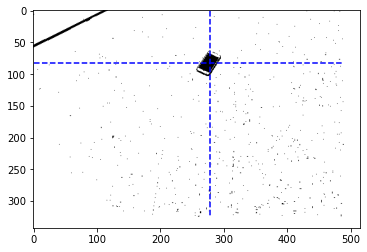

In [15]:
plt.imshow(X_gs[23].astype('uint8'), cmap=plt.get_cmap("gray"))
plt.hlines(Y[23][1] * 326, xmin = 0, xmax = 490, color = 'b', linestyle = '--')
plt.vlines(Y[23][0] * 490, ymin = 0, ymax = 326, color = 'b', linestyle = '--')

In [415]:
#convert to a test and train set 
x_train = X_gs[:100]
y_train = Y[:100]

#test
x_test = X_gs[100:len(X_gs)]
y_test = Y[100:len(X_gs)]

random_pic = np.random.choice(np.arange(0, len(x_train)))
random_pic

86

In [416]:
x_train

array([[[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]],

       [[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]],

       [[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]],

       ...,

       [[255., 255., 255

In [417]:
import math

#create the box
def box_mat(X, Y, rad = 0.05, plot_box = False):
    
    x_rad = math.floor(rad * 490)
    y_rad = math.floor(rad * 326)
    
    
    x_0, y_0 = Y[0], Y[1]
        
    x_0 = x_0 * 490
    y_0 = y_0 * 326
    
    #boundaries
    x1 = math.floor(x_0 - x_rad)
    x2 = math.floor(x_0 + x_rad)
    y1 = math.floor(y_0 - y_rad)
    y2 = math.floor(y_0 + y_rad)
    
    mat = X[y1:y2, x1:x2]
    
    return mat.astype('uint8')

In [418]:
mat = box_mat(x_train[random_pic], y_train[random_pic])

In [421]:
mat

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

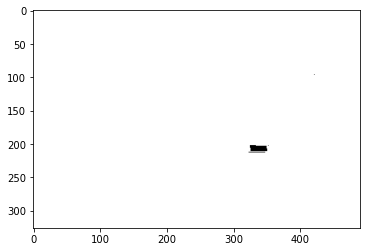

In [420]:
plt.imshow(x_train[random_pic].astype('uint8'), cmap=plt.get_cmap("gray"))

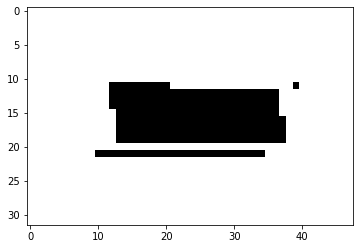

In [422]:
plt.imshow(mat.astype('uint8'),  cmap=plt.get_cmap("gray"))

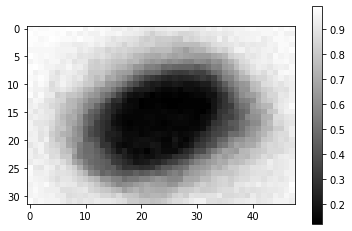

In [424]:
m = np.zeros([32, 48])

#collect the pictures
for i in range(len(x_train)):
    
    X_i = x_train[i]
    Y_i = y_train[i]
    
    try:

        mat = box_mat(X_i, Y_i)
        m += mat
    
    except:
        pass
        
        
#normalize m
m = m/len(x_train)

#plot 
plt.imshow(m/255, cmap=plt.get_cmap("gray"))
plt.colorbar()
plt.show()

In [98]:
i_max = x_test.shape[1] - m.shape[0]
k_max = x_test.shape[2] - m.shape[1]

#list with scores
MSE = {}

for s in range(len(x_test) - 27):
    
    mse_n = []
    
    for i in range(i_max):
        
        for k in range(k_max):
            
            mat = x_test[s][i: (i + m.shape[0]), k: (k + m.shape[1])]
            
            mse_n.append( (np.sum(np.square(mat/255 - m/255)), (i/326 + 0.05, k/490 + 0.05)))
            
            #calculate the mean square error between matrix and the m matrix
    MSE[s] = mse_n
        

In [109]:
min_index = min(MSE[1], key = lambda i : i[0])[1]

In [110]:
min_index

(0.2187116564417178, 0.46224489795918366)

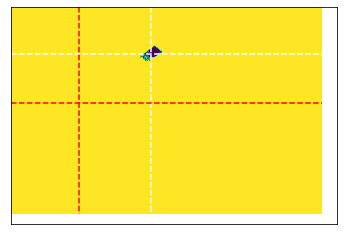

In [111]:
plot_data(x_test[1], y_test[1], min_index)

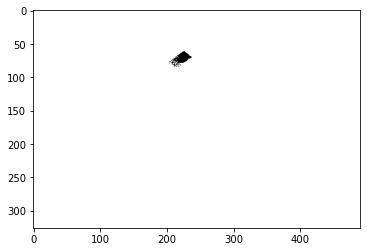

In [113]:
plt.imshow(x_test[1].astype('uint8'), cmap=plt.get_cmap("gray"))

**Baysian estimator**

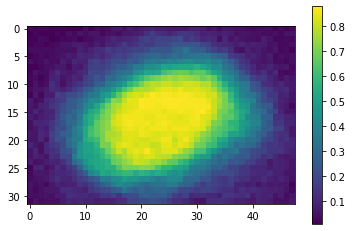

In [222]:
#create the prior

Prior = 1 - m/255 #change to 1 - m/255

plt.imshow(Prior)
plt.colorbar()
plt.show()

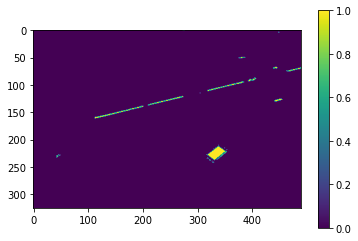

In [233]:
#likelihood
num = 25

x_like = x_test[num]/255 
x_like = 1 - x_like
plt.imshow(x_like)
plt.colorbar()
plt.show()


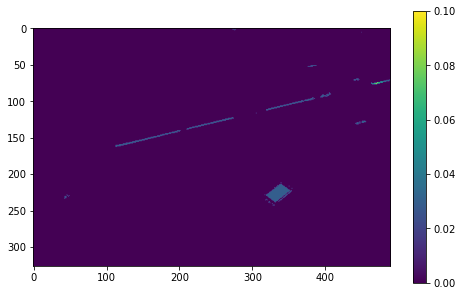

In [236]:
#calculate the posterior 
#likelihood 

i_max = x_test.shape[1] - m.shape[0]
k_max = x_test.shape[2] - m.shape[1]

#posterior matrix
x_post = np.zeros([x_like.shape[0], x_like.shape[1]])

for i in range(i_max):

    for k in range(k_max):

        likelihood = x_like[i: (i + m.shape[0]), k: (k + m.shape[1])]
        
        post = likelihood * Prior
        
        post_n = post
        
        x_post[i: (i + m.shape[0]), k: (k + m.shape[1])] = post_n

plt.figure(figsize = (8, 5))        
plt.imshow(x_post)
plt.colorbar()

**Bayes estimator on sub matrices**

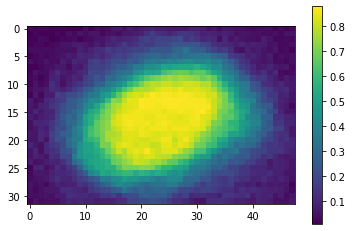

In [331]:
#create the prior

Prior = 1 - m/255 #change to 1 - m/255

plt.imshow(Prior)
plt.colorbar()
plt.show()

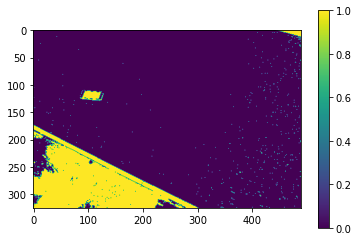

In [405]:
#likelihood
num = 17

x_like = x_test[num]/255 
x_like = 1 - x_like
plt.imshow(x_like)
plt.colorbar()
plt.show()


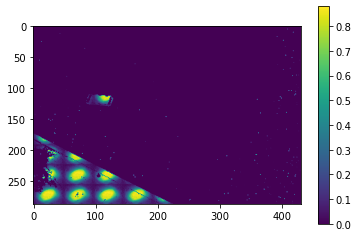

In [410]:

rows = np.arange(0, Prior.shape[0] * math.floor(x_test.shape[1]/Prior.shape[0]), Prior.shape[0])
cols = np.arange(0, Prior.shape[1] * math.floor(x_test.shape[2]/Prior.shape[1]), Prior.shape[1])

#posterior matrix
x_post = np.zeros([max(rows), max(cols)])

for r in range(len(rows) - 1):

    for c in range(len(cols) - 1):

        likelihood = x_like[rows[r]: rows[r + 1], cols[c]: cols[c + 1]]
        
        post = likelihood * Prior
        
        post_n = post
        
        x_post[rows[r]: rows[r + 1], cols[c]: cols[c + 1]] = post_n
        
plt.imshow(x_post)
plt.colorbar()

In [414]:
x_test.shape

(29, 326, 490)

In [407]:
phone_x = np.where(x_post == np.max(x_post))[1][0]/490
phone_y = np.where(x_post == np.max(x_post))[0][0]/326
print(tuple((np.round(phone_x, 4), np.round(phone_y,4))))

(0.7408, 0.5307)


In [408]:
print(Y[num + 100])

[0.2163 0.365 ]


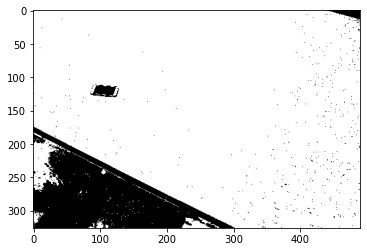

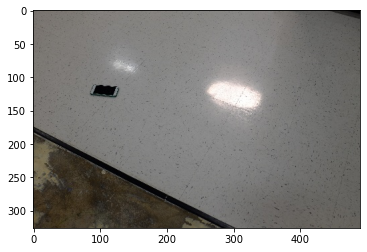

In [409]:
plt.figure()
plt.imshow(x_test[num].astype('uint8'), cmap = plt.get_cmap('gray'))

plt.figure()
plt.imshow(X[num + 100].astype('uint8'))